In [1]:
import numpy as np
import pandas as pd
import yahoo_fin as yf
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt
import scipy
import tensorflow

/Users/chandramoulireddy/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.random.seed(42)
start = '2020-01-13'
end = '2022-01-13'

In [3]:
meta = get_data('MSFT',start_date=start,end_date=end)
spy = get_data('SPY',start_date=start,end_date=end)

In [4]:
meta.drop('adjclose',axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
meta['label1'] = meta['close'].pct_change()

In [7]:
meta

,open,high,low,close,volume,ticker,label1
2020-01-13,161.759995,163.309998,161.259995,163.279999,21626500,MSFT,NaN
2020-01-14,163.389999,163.600006,161.720001,162.130005,23477400,MSFT,-0.007043
2020-01-15,162.619995,163.940002,162.570007,163.179993,21417900,MSFT,0.006476
2020-01-16,164.350006,166.240005,164.029999,166.169998,23865400,MSFT,0.018323
2020-01-17,167.419998,167.470001,165.429993,167.100006,34371700,MSFT,0.005597
...,...,...,...,...,...,...,...
2022-01-06,313.149994,318.700012,311.489990,313.880005,39646100,MSFT,-0.007902
2022-01-07,314.149994,316.500000,310.089996,314.040009,32720000,MSFT,0.000510
2022-01-10,309.489990,314.720001,304.690002,314.269989,44289500,MSFT,0.000732
2022-01-11,313.380005,316.609985,309.890015,314.980011,29386800,MSFT,0.002259


In [8]:
meta['spy'] = spy['close']
meta['spy_vol'] = spy['volume']
meta['spy_vol'] /= 100000

In [9]:
meta['label1'] *= 100

In [10]:
meta.dropna(inplace=True)

In [11]:
meta['volume'] = meta['volume']/100000

In [12]:
meta['label'] = 0

In [13]:
meta['class'], bins = pd.qcut(meta['label1'], q=5, labels=False, retbins=True)

In [14]:
meta['class'] = meta['class'].astype(int)

In [15]:
meta['class'] = meta['class'].shift(-1)

In [16]:
meta.dropna(inplace=True)
meta = meta.reset_index(drop=True)

In [17]:
one_hot = pd.get_dummies(meta['class'], prefix='class')
meta = pd.concat([meta, one_hot], axis=1)

In [18]:
meta.head()

,open,high,low,close,volume,ticker,label1,spy,spy_vol,label,class,class_0.0,class_1.0,class_2.0,class_3.0,class_4.0
0,163.389999,163.600006,161.720001,162.130005,234.774,MSFT,-0.704308,327.450012,628.328,0,3.0,0,0,0,1,0
1,162.619995,163.940002,162.570007,163.179993,214.179,MSFT,0.647621,328.190002,720.566,0,4.0,0,0,0,0,1
2,164.350006,166.240005,164.029999,166.169998,238.654,MSFT,1.832336,330.920013,540.503,0,3.0,0,0,0,1,0
3,167.419998,167.470001,165.429993,167.100006,343.717,MSFT,0.559673,331.950012,958.460,0,1.0,0,1,0,0,0
4,166.679993,168.190002,166.429993,166.500000,295.172,MSFT,-0.359070,331.299988,777.424,0,1.0,0,1,0,0,0


In [19]:
'''meta['class_0.0'] *=2
meta['class_1.0'] *=2
meta['class_2.0'] *=2
meta['class_3.0'] *=2
meta['class_4.0'] *=2''''''

SyntaxError: incomplete input (2888682700.py, line 5)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(meta[['low','high','close','volume','spy','spy_vol']],meta[['class_0.0','class_1.0','class_2.0','class_3.0','class_4.0']],test_size=0.3,random_state=42)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [22]:
model = Sequential()

In [23]:
model.add(Dense(128,input_dim = 6, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

In [71]:
model.compile(optimizer = Adam(learning_rate=0.000008), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(X_train, y_train,batch_size=64, epochs=2000,validation_split=0.2)

Epoch 1/2000
5/5 [==============================] - 0s 16ms/step - loss: 20.4299 - accuracy: 0.2349 - val_loss: 5.8688 - val_accuracy: 0.2676
Epoch 2/2000
5/5 [==============================] - 0s 4ms/step - loss: 24.9965 - accuracy: 0.2171 - val_loss: 5.8768 - val_accuracy: 0.2676
Epoch 3/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.9358 - accuracy: 0.2171 - val_loss: 5.9083 - val_accuracy: 0.2676
Epoch 4/2000
5/5 [==============================] - 0s 4ms/step - loss: 25.9188 - accuracy: 0.2206 - val_loss: 5.9313 - val_accuracy: 0.2676
Epoch 5/2000
5/5 [==============================] - 0s 4ms/step - loss: 25.3875 - accuracy: 0.1993 - val_loss: 5.9375 - val_accuracy: 0.2676
Epoch 6/2000
5/5 [==============================] - 0s 4ms/step - loss: 25.2451 - accuracy: 0.2064 - val_loss: 5.9520 - val_accuracy: 0.2535
Epoch 7/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.4589 - accuracy: 0.2384 - val_loss: 5.9676 - val_accuracy: 0.2676
Epoch 8/2000

Epoch 59/2000
5/5 [==============================] - 0s 3ms/step - loss: 21.8935 - accuracy: 0.2349 - val_loss: 5.8733 - val_accuracy: 0.2817
Epoch 60/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.0205 - accuracy: 0.2633 - val_loss: 5.8772 - val_accuracy: 0.2817
Epoch 61/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.0215 - accuracy: 0.2598 - val_loss: 5.8855 - val_accuracy: 0.2817
Epoch 62/2000
5/5 [==============================] - 0s 3ms/step - loss: 21.0332 - accuracy: 0.2349 - val_loss: 5.8800 - val_accuracy: 0.2817
Epoch 63/2000
5/5 [==============================] - 0s 3ms/step - loss: 20.5882 - accuracy: 0.2278 - val_loss: 5.8745 - val_accuracy: 0.2676
Epoch 64/2000
5/5 [==============================] - 0s 3ms/step - loss: 20.7847 - accuracy: 0.2349 - val_loss: 5.8660 - val_accuracy: 0.2676
Epoch 65/2000
5/5 [==============================] - 0s 3ms/step - loss: 20.6820 - accuracy: 0.2633 - val_loss: 5.8508 - val_accuracy: 0.2676
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 23.2163 - accuracy: 0.2313 - val_loss: 5.8139 - val_accuracy: 0.2676
Epoch 117/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.6826 - accuracy: 0.2206 - val_loss: 5.8023 - val_accuracy: 0.2676
Epoch 118/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.5121 - accuracy: 0.2278 - val_loss: 5.7906 - val_accuracy: 0.2676
Epoch 119/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.3321 - accuracy: 0.2206 - val_loss: 5.7903 - val_accuracy: 0.2676
Epoch 120/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.8267 - accuracy: 0.2420 - val_loss: 5.7935 - val_accuracy: 0.2676
Epoch 121/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.2710 - accuracy: 0.2313 - val_loss: 5.7983 - val_accuracy: 0.2676
Epoch 122/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.4653 - accuracy: 0.2206 - val_loss: 5.8012 - val_accuracy: 0.2676
Epoch 123/2000

5/5 [==============================] - 0s 3ms/step - loss: 23.0707 - accuracy: 0.1993 - val_loss: 5.6480 - val_accuracy: 0.2817
Epoch 174/2000
5/5 [==============================] - 0s 4ms/step - loss: 22.5426 - accuracy: 0.1744 - val_loss: 5.6441 - val_accuracy: 0.2817
Epoch 175/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.0989 - accuracy: 0.2028 - val_loss: 5.6386 - val_accuracy: 0.2958
Epoch 176/2000
5/5 [==============================] - 0s 3ms/step - loss: 19.3802 - accuracy: 0.2242 - val_loss: 5.6369 - val_accuracy: 0.2958
Epoch 177/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.8641 - accuracy: 0.2278 - val_loss: 5.6374 - val_accuracy: 0.2958
Epoch 178/2000
5/5 [==============================] - 0s 3ms/step - loss: 20.8909 - accuracy: 0.1886 - val_loss: 5.6357 - val_accuracy: 0.2958
Epoch 179/2000
5/5 [==============================] - 0s 3ms/step - loss: 20.8874 - accuracy: 0.2349 - val_loss: 5.6410 - val_accuracy: 0.2958
Epoch 180/2000

5/5 [==============================] - 0s 4ms/step - loss: 20.3311 - accuracy: 0.2171 - val_loss: 5.6020 - val_accuracy: 0.2817
Epoch 231/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.6668 - accuracy: 0.2135 - val_loss: 5.6056 - val_accuracy: 0.2817
Epoch 232/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.9734 - accuracy: 0.1922 - val_loss: 5.6211 - val_accuracy: 0.2817
Epoch 233/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.9573 - accuracy: 0.2633 - val_loss: 5.6424 - val_accuracy: 0.2817
Epoch 234/2000
5/5 [==============================] - 0s 4ms/step - loss: 22.0722 - accuracy: 0.2242 - val_loss: 5.6617 - val_accuracy: 0.2817
Epoch 235/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.8043 - accuracy: 0.2349 - val_loss: 5.6758 - val_accuracy: 0.2817
Epoch 236/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.1952 - accuracy: 0.2633 - val_loss: 5.6870 - val_accuracy: 0.2817
Epoch 237/2000

5/5 [==============================] - 0s 4ms/step - loss: 17.4512 - accuracy: 0.2349 - val_loss: 5.4503 - val_accuracy: 0.2817
Epoch 288/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.5274 - accuracy: 0.2847 - val_loss: 5.4504 - val_accuracy: 0.2817
Epoch 289/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.8295 - accuracy: 0.2349 - val_loss: 5.4520 - val_accuracy: 0.2817
Epoch 290/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.6791 - accuracy: 0.2171 - val_loss: 5.4560 - val_accuracy: 0.2817
Epoch 291/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.7698 - accuracy: 0.2420 - val_loss: 5.4596 - val_accuracy: 0.2817
Epoch 292/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.4392 - accuracy: 0.2384 - val_loss: 5.4682 - val_accuracy: 0.2958
Epoch 293/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.8268 - accuracy: 0.2206 - val_loss: 5.4678 - val_accuracy: 0.2958
Epoch 294/2000

5/5 [==============================] - 0s 3ms/step - loss: 23.2417 - accuracy: 0.2384 - val_loss: 5.3498 - val_accuracy: 0.2817
Epoch 345/2000
5/5 [==============================] - 0s 3ms/step - loss: 21.4905 - accuracy: 0.1815 - val_loss: 5.3370 - val_accuracy: 0.2817
Epoch 346/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.1963 - accuracy: 0.2349 - val_loss: 5.3257 - val_accuracy: 0.2817
Epoch 347/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.2937 - accuracy: 0.2028 - val_loss: 5.3187 - val_accuracy: 0.2817
Epoch 348/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.9040 - accuracy: 0.2918 - val_loss: 5.3072 - val_accuracy: 0.2817
Epoch 349/2000
5/5 [==============================] - 0s 3ms/step - loss: 21.1092 - accuracy: 0.1957 - val_loss: 5.2943 - val_accuracy: 0.2817
Epoch 350/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.9087 - accuracy: 0.2384 - val_loss: 5.2789 - val_accuracy: 0.2817
Epoch 351/2000

5/5 [==============================] - 0s 3ms/step - loss: 17.6343 - accuracy: 0.2206 - val_loss: 5.3548 - val_accuracy: 0.2958
Epoch 402/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.7143 - accuracy: 0.1779 - val_loss: 5.3488 - val_accuracy: 0.2958
Epoch 403/2000
5/5 [==============================] - 0s 3ms/step - loss: 19.4767 - accuracy: 0.2206 - val_loss: 5.3557 - val_accuracy: 0.2958
Epoch 404/2000
5/5 [==============================] - 0s 3ms/step - loss: 18.7841 - accuracy: 0.2491 - val_loss: 5.3747 - val_accuracy: 0.2958
Epoch 405/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.8215 - accuracy: 0.2527 - val_loss: 5.3715 - val_accuracy: 0.2958
Epoch 406/2000
5/5 [==============================] - 0s 3ms/step - loss: 18.7345 - accuracy: 0.2242 - val_loss: 5.3679 - val_accuracy: 0.2958
Epoch 407/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.0298 - accuracy: 0.2384 - val_loss: 5.3646 - val_accuracy: 0.2958
Epoch 408/2000

5/5 [==============================] - 0s 4ms/step - loss: 18.4382 - accuracy: 0.2491 - val_loss: 5.2006 - val_accuracy: 0.2958
Epoch 459/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.2945 - accuracy: 0.2313 - val_loss: 5.2164 - val_accuracy: 0.2958
Epoch 460/2000
5/5 [==============================] - 0s 3ms/step - loss: 22.2490 - accuracy: 0.2100 - val_loss: 5.2330 - val_accuracy: 0.2958
Epoch 461/2000
5/5 [==============================] - 0s 3ms/step - loss: 22.9728 - accuracy: 0.2064 - val_loss: 5.2504 - val_accuracy: 0.2958
Epoch 462/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.7060 - accuracy: 0.1922 - val_loss: 5.2643 - val_accuracy: 0.2958
Epoch 463/2000
5/5 [==============================] - 0s 3ms/step - loss: 18.1533 - accuracy: 0.2242 - val_loss: 5.2679 - val_accuracy: 0.2817
Epoch 464/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.7700 - accuracy: 0.2206 - val_loss: 5.2693 - val_accuracy: 0.2958
Epoch 465/2000

5/5 [==============================] - 0s 3ms/step - loss: 18.7857 - accuracy: 0.2527 - val_loss: 5.3325 - val_accuracy: 0.2676
Epoch 516/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.1787 - accuracy: 0.2313 - val_loss: 5.3371 - val_accuracy: 0.2817
Epoch 517/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.5963 - accuracy: 0.2171 - val_loss: 5.3351 - val_accuracy: 0.2817
Epoch 518/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.0464 - accuracy: 0.1957 - val_loss: 5.3401 - val_accuracy: 0.2817
Epoch 519/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.2503 - accuracy: 0.1886 - val_loss: 5.3424 - val_accuracy: 0.2817
Epoch 520/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.1337 - accuracy: 0.2384 - val_loss: 5.3479 - val_accuracy: 0.2817
Epoch 521/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.3741 - accuracy: 0.2527 - val_loss: 5.3482 - val_accuracy: 0.2817
Epoch 522/2000

5/5 [==============================] - 0s 3ms/step - loss: 18.7220 - accuracy: 0.2100 - val_loss: 5.3608 - val_accuracy: 0.2535
Epoch 573/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.5286 - accuracy: 0.2135 - val_loss: 5.3538 - val_accuracy: 0.2535
Epoch 574/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.2249 - accuracy: 0.2384 - val_loss: 5.3530 - val_accuracy: 0.2535
Epoch 575/2000
5/5 [==============================] - 0s 3ms/step - loss: 21.8201 - accuracy: 0.1601 - val_loss: 5.3401 - val_accuracy: 0.2535
Epoch 576/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.3819 - accuracy: 0.2562 - val_loss: 5.3236 - val_accuracy: 0.2535
Epoch 577/2000
5/5 [==============================] - 0s 4ms/step - loss: 21.1399 - accuracy: 0.2171 - val_loss: 5.3121 - val_accuracy: 0.2676
Epoch 578/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.5875 - accuracy: 0.2313 - val_loss: 5.3064 - val_accuracy: 0.2676
Epoch 579/2000

5/5 [==============================] - 0s 3ms/step - loss: 17.1080 - accuracy: 0.2349 - val_loss: 5.1968 - val_accuracy: 0.2676
Epoch 630/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.2708 - accuracy: 0.2527 - val_loss: 5.1932 - val_accuracy: 0.2676
Epoch 631/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.7116 - accuracy: 0.2562 - val_loss: 5.1861 - val_accuracy: 0.2676
Epoch 632/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.5829 - accuracy: 0.2064 - val_loss: 5.1769 - val_accuracy: 0.2676
Epoch 633/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.7940 - accuracy: 0.1886 - val_loss: 5.1740 - val_accuracy: 0.2676
Epoch 634/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.8305 - accuracy: 0.2633 - val_loss: 5.1676 - val_accuracy: 0.2676
Epoch 635/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.6577 - accuracy: 0.2349 - val_loss: 5.1612 - val_accuracy: 0.2676
Epoch 636/2000

5/5 [==============================] - 0s 4ms/step - loss: 18.6867 - accuracy: 0.2100 - val_loss: 5.1140 - val_accuracy: 0.2676
Epoch 687/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.7742 - accuracy: 0.2740 - val_loss: 5.1172 - val_accuracy: 0.2676
Epoch 688/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.2222 - accuracy: 0.1993 - val_loss: 5.1265 - val_accuracy: 0.2676
Epoch 689/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.2611 - accuracy: 0.2384 - val_loss: 5.1452 - val_accuracy: 0.2676
Epoch 690/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.8475 - accuracy: 0.1886 - val_loss: 5.1593 - val_accuracy: 0.2676
Epoch 691/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.0263 - accuracy: 0.1886 - val_loss: 5.1655 - val_accuracy: 0.2676
Epoch 692/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.2403 - accuracy: 0.2811 - val_loss: 5.1679 - val_accuracy: 0.2676
Epoch 693/2000

5/5 [==============================] - 0s 4ms/step - loss: 19.2960 - accuracy: 0.1922 - val_loss: 5.1656 - val_accuracy: 0.2817
Epoch 744/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.7173 - accuracy: 0.2384 - val_loss: 5.1723 - val_accuracy: 0.2817
Epoch 745/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.4616 - accuracy: 0.2100 - val_loss: 5.1815 - val_accuracy: 0.2817
Epoch 746/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.6831 - accuracy: 0.2811 - val_loss: 5.1798 - val_accuracy: 0.2817
Epoch 747/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.4903 - accuracy: 0.2456 - val_loss: 5.1765 - val_accuracy: 0.2817
Epoch 748/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.8379 - accuracy: 0.2171 - val_loss: 5.1664 - val_accuracy: 0.2817
Epoch 749/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.0624 - accuracy: 0.2527 - val_loss: 5.1459 - val_accuracy: 0.2958
Epoch 750/2000

5/5 [==============================] - 0s 3ms/step - loss: 19.6396 - accuracy: 0.1957 - val_loss: 5.1942 - val_accuracy: 0.2817
Epoch 801/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.2483 - accuracy: 0.2384 - val_loss: 5.1916 - val_accuracy: 0.2817
Epoch 802/2000
5/5 [==============================] - 0s 3ms/step - loss: 21.3145 - accuracy: 0.2171 - val_loss: 5.1878 - val_accuracy: 0.2817
Epoch 803/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.2359 - accuracy: 0.2562 - val_loss: 5.1897 - val_accuracy: 0.2817
Epoch 804/2000
5/5 [==============================] - 0s 3ms/step - loss: 19.4115 - accuracy: 0.2135 - val_loss: 5.1963 - val_accuracy: 0.2817
Epoch 805/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.7772 - accuracy: 0.2242 - val_loss: 5.1957 - val_accuracy: 0.2817
Epoch 806/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.3146 - accuracy: 0.2669 - val_loss: 5.1954 - val_accuracy: 0.2817
Epoch 807/2000

5/5 [==============================] - 0s 3ms/step - loss: 18.4797 - accuracy: 0.2028 - val_loss: 5.0675 - val_accuracy: 0.2676
Epoch 858/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.2646 - accuracy: 0.2206 - val_loss: 5.0657 - val_accuracy: 0.2676
Epoch 859/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.6016 - accuracy: 0.2349 - val_loss: 5.0635 - val_accuracy: 0.2676
Epoch 860/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.5819 - accuracy: 0.2349 - val_loss: 5.0626 - val_accuracy: 0.2676
Epoch 861/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.8118 - accuracy: 0.2171 - val_loss: 5.0676 - val_accuracy: 0.2676
Epoch 862/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.5825 - accuracy: 0.1922 - val_loss: 5.0726 - val_accuracy: 0.2676
Epoch 863/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.7970 - accuracy: 0.2242 - val_loss: 5.0838 - val_accuracy: 0.2676
Epoch 864/2000

5/5 [==============================] - 0s 4ms/step - loss: 22.9308 - accuracy: 0.1815 - val_loss: 5.0413 - val_accuracy: 0.2817
Epoch 915/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.7285 - accuracy: 0.2349 - val_loss: 5.0435 - val_accuracy: 0.2817
Epoch 916/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.6922 - accuracy: 0.2456 - val_loss: 5.0414 - val_accuracy: 0.2817
Epoch 917/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.7874 - accuracy: 0.1886 - val_loss: 5.0414 - val_accuracy: 0.2676
Epoch 918/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.9960 - accuracy: 0.2313 - val_loss: 5.0488 - val_accuracy: 0.2676
Epoch 919/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.6207 - accuracy: 0.2064 - val_loss: 5.0573 - val_accuracy: 0.2817
Epoch 920/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.8375 - accuracy: 0.2064 - val_loss: 5.0757 - val_accuracy: 0.2817
Epoch 921/2000

5/5 [==============================] - 0s 4ms/step - loss: 18.6965 - accuracy: 0.2420 - val_loss: 4.9858 - val_accuracy: 0.2676
Epoch 972/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.6228 - accuracy: 0.2705 - val_loss: 4.9808 - val_accuracy: 0.2676
Epoch 973/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.3543 - accuracy: 0.2811 - val_loss: 4.9780 - val_accuracy: 0.2676
Epoch 974/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.7778 - accuracy: 0.2100 - val_loss: 4.9769 - val_accuracy: 0.2676
Epoch 975/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.6513 - accuracy: 0.2242 - val_loss: 4.9743 - val_accuracy: 0.2676
Epoch 976/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.9141 - accuracy: 0.2740 - val_loss: 4.9614 - val_accuracy: 0.2676
Epoch 977/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.0765 - accuracy: 0.2135 - val_loss: 4.9496 - val_accuracy: 0.2676
Epoch 978/2000

5/5 [==============================] - 0s 3ms/step - loss: 16.3114 - accuracy: 0.2491 - val_loss: 4.8063 - val_accuracy: 0.2676
Epoch 1029/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.6211 - accuracy: 0.2313 - val_loss: 4.8196 - val_accuracy: 0.2676
Epoch 1030/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.1113 - accuracy: 0.2135 - val_loss: 4.8219 - val_accuracy: 0.2676
Epoch 1031/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.3641 - accuracy: 0.1779 - val_loss: 4.8204 - val_accuracy: 0.2676
Epoch 1032/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.6469 - accuracy: 0.2278 - val_loss: 4.8192 - val_accuracy: 0.2676
Epoch 1033/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.3818 - accuracy: 0.2349 - val_loss: 4.8192 - val_accuracy: 0.2676
Epoch 1034/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.8812 - accuracy: 0.2313 - val_loss: 4.8227 - val_accuracy: 0.2676
Epoch 10

5/5 [==============================] - 0s 3ms/step - loss: 16.9178 - accuracy: 0.2064 - val_loss: 4.8168 - val_accuracy: 0.2676
Epoch 1086/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.1887 - accuracy: 0.2313 - val_loss: 4.8156 - val_accuracy: 0.2676
Epoch 1087/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.5577 - accuracy: 0.1886 - val_loss: 4.8195 - val_accuracy: 0.2676
Epoch 1088/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.6603 - accuracy: 0.2954 - val_loss: 4.8191 - val_accuracy: 0.2676
Epoch 1089/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.7055 - accuracy: 0.2171 - val_loss: 4.8191 - val_accuracy: 0.2676
Epoch 1090/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.2282 - accuracy: 0.1922 - val_loss: 4.8213 - val_accuracy: 0.2676
Epoch 1091/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.1057 - accuracy: 0.2811 - val_loss: 4.8154 - val_accuracy: 0.2676
Epoch 10

5/5 [==============================] - 0s 4ms/step - loss: 17.2225 - accuracy: 0.2100 - val_loss: 4.6230 - val_accuracy: 0.2676
Epoch 1143/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.1829 - accuracy: 0.2349 - val_loss: 4.6338 - val_accuracy: 0.2676
Epoch 1144/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.4194 - accuracy: 0.1886 - val_loss: 4.6491 - val_accuracy: 0.2676
Epoch 1145/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.0867 - accuracy: 0.2313 - val_loss: 4.6583 - val_accuracy: 0.2676
Epoch 1146/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.1665 - accuracy: 0.2028 - val_loss: 4.6662 - val_accuracy: 0.2676
Epoch 1147/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.2017 - accuracy: 0.2064 - val_loss: 4.6669 - val_accuracy: 0.2676
Epoch 1148/2000
5/5 [==============================] - 0s 4ms/step - loss: 20.1030 - accuracy: 0.2562 - val_loss: 4.6690 - val_accuracy: 0.2676
Epoch 11

5/5 [==============================] - 0s 4ms/step - loss: 15.6342 - accuracy: 0.2633 - val_loss: 4.7164 - val_accuracy: 0.2676
Epoch 1200/2000
5/5 [==============================] - 0s 3ms/step - loss: 17.4394 - accuracy: 0.2420 - val_loss: 4.7237 - val_accuracy: 0.2676
Epoch 1201/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.5698 - accuracy: 0.2028 - val_loss: 4.7374 - val_accuracy: 0.2676
Epoch 1202/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.3609 - accuracy: 0.2242 - val_loss: 4.7371 - val_accuracy: 0.2676
Epoch 1203/2000
5/5 [==============================] - 0s 3ms/step - loss: 18.3082 - accuracy: 0.2206 - val_loss: 4.7329 - val_accuracy: 0.2676
Epoch 1204/2000
5/5 [==============================] - 0s 3ms/step - loss: 19.4534 - accuracy: 0.2171 - val_loss: 4.7265 - val_accuracy: 0.2676
Epoch 1205/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.1251 - accuracy: 0.2100 - val_loss: 4.7231 - val_accuracy: 0.2676
Epoch 12

5/5 [==============================] - 0s 3ms/step - loss: 16.5973 - accuracy: 0.2064 - val_loss: 4.7360 - val_accuracy: 0.2676
Epoch 1257/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.9279 - accuracy: 0.1886 - val_loss: 4.7188 - val_accuracy: 0.2676
Epoch 1258/2000
5/5 [==============================] - 0s 3ms/step - loss: 18.4828 - accuracy: 0.1779 - val_loss: 4.7116 - val_accuracy: 0.2676
Epoch 1259/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.5694 - accuracy: 0.2100 - val_loss: 4.7172 - val_accuracy: 0.2817
Epoch 1260/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.2023 - accuracy: 0.2171 - val_loss: 4.7142 - val_accuracy: 0.2817
Epoch 1261/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.8477 - accuracy: 0.2242 - val_loss: 4.7081 - val_accuracy: 0.2817
Epoch 1262/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.3370 - accuracy: 0.1957 - val_loss: 4.7118 - val_accuracy: 0.2817
Epoch 12

5/5 [==============================] - 0s 3ms/step - loss: 16.2109 - accuracy: 0.1993 - val_loss: 4.6206 - val_accuracy: 0.2817
Epoch 1314/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.9402 - accuracy: 0.2064 - val_loss: 4.6249 - val_accuracy: 0.2817
Epoch 1315/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.0702 - accuracy: 0.2242 - val_loss: 4.6252 - val_accuracy: 0.2817
Epoch 1316/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.4105 - accuracy: 0.2278 - val_loss: 4.6283 - val_accuracy: 0.2817
Epoch 1317/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.6331 - accuracy: 0.2242 - val_loss: 4.6279 - val_accuracy: 0.2817
Epoch 1318/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.3646 - accuracy: 0.2669 - val_loss: 4.6254 - val_accuracy: 0.2817
Epoch 1319/2000
5/5 [==============================] - 0s 3ms/step - loss: 18.0370 - accuracy: 0.2420 - val_loss: 4.6227 - val_accuracy: 0.2817
Epoch 13

5/5 [==============================] - 0s 3ms/step - loss: 19.6173 - accuracy: 0.2384 - val_loss: 4.6186 - val_accuracy: 0.2817
Epoch 1371/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.0038 - accuracy: 0.1922 - val_loss: 4.6181 - val_accuracy: 0.2817
Epoch 1372/2000
5/5 [==============================] - 0s 4ms/step - loss: 19.0117 - accuracy: 0.2206 - val_loss: 4.6222 - val_accuracy: 0.2817
Epoch 1373/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.5210 - accuracy: 0.1851 - val_loss: 4.6166 - val_accuracy: 0.2817
Epoch 1374/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.1165 - accuracy: 0.2313 - val_loss: 4.6149 - val_accuracy: 0.2817
Epoch 1375/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.5325 - accuracy: 0.2420 - val_loss: 4.6138 - val_accuracy: 0.2817
Epoch 1376/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.9821 - accuracy: 0.2313 - val_loss: 4.6107 - val_accuracy: 0.2817
Epoch 13

5/5 [==============================] - 0s 4ms/step - loss: 15.4578 - accuracy: 0.1993 - val_loss: 4.5465 - val_accuracy: 0.2817
Epoch 1428/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.4314 - accuracy: 0.2384 - val_loss: 4.5559 - val_accuracy: 0.2817
Epoch 1429/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.6035 - accuracy: 0.1993 - val_loss: 4.5633 - val_accuracy: 0.2817
Epoch 1430/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.9113 - accuracy: 0.2384 - val_loss: 4.5722 - val_accuracy: 0.2817
Epoch 1431/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.0843 - accuracy: 0.2420 - val_loss: 4.5867 - val_accuracy: 0.2817
Epoch 1432/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.5173 - accuracy: 0.2420 - val_loss: 4.5968 - val_accuracy: 0.2676
Epoch 1433/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.5584 - accuracy: 0.2135 - val_loss: 4.5985 - val_accuracy: 0.2676
Epoch 14

5/5 [==============================] - 0s 3ms/step - loss: 13.2569 - accuracy: 0.2598 - val_loss: 4.7073 - val_accuracy: 0.2676
Epoch 1485/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.4194 - accuracy: 0.2420 - val_loss: 4.7065 - val_accuracy: 0.2676
Epoch 1486/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.1677 - accuracy: 0.1637 - val_loss: 4.6969 - val_accuracy: 0.2676
Epoch 1487/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.0574 - accuracy: 0.1993 - val_loss: 4.6943 - val_accuracy: 0.2676
Epoch 1488/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.3643 - accuracy: 0.2705 - val_loss: 4.6941 - val_accuracy: 0.2676
Epoch 1489/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.0897 - accuracy: 0.2171 - val_loss: 4.6948 - val_accuracy: 0.2817
Epoch 1490/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.2666 - accuracy: 0.2171 - val_loss: 4.6912 - val_accuracy: 0.2817
Epoch 14

5/5 [==============================] - 0s 4ms/step - loss: 14.9015 - accuracy: 0.2064 - val_loss: 4.5803 - val_accuracy: 0.2676
Epoch 1542/2000
5/5 [==============================] - 0s 4ms/step - loss: 18.0126 - accuracy: 0.2135 - val_loss: 4.5917 - val_accuracy: 0.2676
Epoch 1543/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.0009 - accuracy: 0.2064 - val_loss: 4.6010 - val_accuracy: 0.2676
Epoch 1544/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.4416 - accuracy: 0.2242 - val_loss: 4.6076 - val_accuracy: 0.2676
Epoch 1545/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.7229 - accuracy: 0.1957 - val_loss: 4.6200 - val_accuracy: 0.2676
Epoch 1546/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.4063 - accuracy: 0.2313 - val_loss: 4.6245 - val_accuracy: 0.2676
Epoch 1547/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.6491 - accuracy: 0.2384 - val_loss: 4.6255 - val_accuracy: 0.2676
Epoch 15

5/5 [==============================] - 0s 4ms/step - loss: 16.4931 - accuracy: 0.2064 - val_loss: 4.5089 - val_accuracy: 0.2817
Epoch 1599/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.8933 - accuracy: 0.2028 - val_loss: 4.5174 - val_accuracy: 0.2817
Epoch 1600/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.7346 - accuracy: 0.2206 - val_loss: 4.5224 - val_accuracy: 0.2817
Epoch 1601/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.5802 - accuracy: 0.2278 - val_loss: 4.5219 - val_accuracy: 0.2817
Epoch 1602/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.5898 - accuracy: 0.2028 - val_loss: 4.5203 - val_accuracy: 0.2817
Epoch 1603/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.5840 - accuracy: 0.1957 - val_loss: 4.5347 - val_accuracy: 0.2817
Epoch 1604/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.7352 - accuracy: 0.2028 - val_loss: 4.5459 - val_accuracy: 0.2817
Epoch 16

5/5 [==============================] - 0s 3ms/step - loss: 13.9086 - accuracy: 0.2135 - val_loss: 4.3854 - val_accuracy: 0.2958
Epoch 1656/2000
5/5 [==============================] - 0s 4ms/step - loss: 12.3737 - accuracy: 0.2384 - val_loss: 4.3724 - val_accuracy: 0.3099
Epoch 1657/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.2096 - accuracy: 0.2171 - val_loss: 4.3633 - val_accuracy: 0.3099
Epoch 1658/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.0918 - accuracy: 0.2206 - val_loss: 4.3540 - val_accuracy: 0.3099
Epoch 1659/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.3873 - accuracy: 0.2491 - val_loss: 4.3480 - val_accuracy: 0.3099
Epoch 1660/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.5202 - accuracy: 0.1993 - val_loss: 4.3424 - val_accuracy: 0.3099
Epoch 1661/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.5531 - accuracy: 0.2313 - val_loss: 4.3363 - val_accuracy: 0.3239
Epoch 16

5/5 [==============================] - 0s 3ms/step - loss: 12.6189 - accuracy: 0.2384 - val_loss: 4.3449 - val_accuracy: 0.3239
Epoch 1713/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.7541 - accuracy: 0.2100 - val_loss: 4.3516 - val_accuracy: 0.3239
Epoch 1714/2000
5/5 [==============================] - 0s 4ms/step - loss: 16.5649 - accuracy: 0.2028 - val_loss: 4.3548 - val_accuracy: 0.3239
Epoch 1715/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.0768 - accuracy: 0.2278 - val_loss: 4.3517 - val_accuracy: 0.3239
Epoch 1716/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.4598 - accuracy: 0.2811 - val_loss: 4.3413 - val_accuracy: 0.3239
Epoch 1717/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.6091 - accuracy: 0.2456 - val_loss: 4.3313 - val_accuracy: 0.3239
Epoch 1718/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.7029 - accuracy: 0.2278 - val_loss: 4.3161 - val_accuracy: 0.3239
Epoch 17

5/5 [==============================] - 0s 3ms/step - loss: 13.2044 - accuracy: 0.2420 - val_loss: 4.1869 - val_accuracy: 0.3099
Epoch 1770/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.6920 - accuracy: 0.2242 - val_loss: 4.1943 - val_accuracy: 0.3099
Epoch 1771/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.0739 - accuracy: 0.2384 - val_loss: 4.1915 - val_accuracy: 0.3099
Epoch 1772/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.4620 - accuracy: 0.1886 - val_loss: 4.1877 - val_accuracy: 0.2958
Epoch 1773/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.4296 - accuracy: 0.2171 - val_loss: 4.1889 - val_accuracy: 0.2958
Epoch 1774/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.4881 - accuracy: 0.2420 - val_loss: 4.1842 - val_accuracy: 0.2958
Epoch 1775/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.8489 - accuracy: 0.2384 - val_loss: 4.1733 - val_accuracy: 0.2958
Epoch 17

5/5 [==============================] - 0s 4ms/step - loss: 13.2548 - accuracy: 0.2598 - val_loss: 4.2149 - val_accuracy: 0.2817
Epoch 1827/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.2553 - accuracy: 0.2598 - val_loss: 4.2129 - val_accuracy: 0.2817
Epoch 1828/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.5628 - accuracy: 0.1993 - val_loss: 4.2147 - val_accuracy: 0.2817
Epoch 1829/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.9393 - accuracy: 0.2064 - val_loss: 4.2211 - val_accuracy: 0.2817
Epoch 1830/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.9749 - accuracy: 0.2171 - val_loss: 4.2290 - val_accuracy: 0.2817
Epoch 1831/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.1078 - accuracy: 0.2883 - val_loss: 4.2341 - val_accuracy: 0.2817
Epoch 1832/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.3314 - accuracy: 0.2171 - val_loss: 4.2317 - val_accuracy: 0.2817
Epoch 18

5/5 [==============================] - 0s 3ms/step - loss: 17.7870 - accuracy: 0.1957 - val_loss: 4.0411 - val_accuracy: 0.2676
Epoch 1884/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.9707 - accuracy: 0.2206 - val_loss: 4.0361 - val_accuracy: 0.2676
Epoch 1885/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.4444 - accuracy: 0.2562 - val_loss: 4.0334 - val_accuracy: 0.2817
Epoch 1886/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.7462 - accuracy: 0.2064 - val_loss: 4.0351 - val_accuracy: 0.2817
Epoch 1887/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.2760 - accuracy: 0.2420 - val_loss: 4.0363 - val_accuracy: 0.2817
Epoch 1888/2000
5/5 [==============================] - 0s 3ms/step - loss: 14.3041 - accuracy: 0.1886 - val_loss: 4.0343 - val_accuracy: 0.2817
Epoch 1889/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.9621 - accuracy: 0.1815 - val_loss: 4.0311 - val_accuracy: 0.2817
Epoch 18

5/5 [==============================] - 0s 4ms/step - loss: 15.2793 - accuracy: 0.2598 - val_loss: 4.1962 - val_accuracy: 0.2676
Epoch 1941/2000
5/5 [==============================] - 0s 4ms/step - loss: 12.1200 - accuracy: 0.2349 - val_loss: 4.1888 - val_accuracy: 0.2676
Epoch 1942/2000
5/5 [==============================] - 0s 3ms/step - loss: 16.4101 - accuracy: 0.2028 - val_loss: 4.1798 - val_accuracy: 0.2676
Epoch 1943/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.2160 - accuracy: 0.2135 - val_loss: 4.1791 - val_accuracy: 0.2676
Epoch 1944/2000
5/5 [==============================] - 0s 4ms/step - loss: 13.3549 - accuracy: 0.1851 - val_loss: 4.1811 - val_accuracy: 0.2676
Epoch 1945/2000
5/5 [==============================] - 0s 3ms/step - loss: 15.3043 - accuracy: 0.2206 - val_loss: 4.1881 - val_accuracy: 0.2676
Epoch 1946/2000
5/5 [==============================] - 0s 3ms/step - loss: 13.7716 - accuracy: 0.1993 - val_loss: 4.1927 - val_accuracy: 0.2676
Epoch 19

5/5 [==============================] - 0s 4ms/step - loss: 15.0009 - accuracy: 0.2384 - val_loss: 4.1082 - val_accuracy: 0.2676
Epoch 1998/2000
5/5 [==============================] - 0s 4ms/step - loss: 15.2683 - accuracy: 0.2384 - val_loss: 4.1098 - val_accuracy: 0.2676
Epoch 1999/2000
5/5 [==============================] - 0s 4ms/step - loss: 14.1652 - accuracy: 0.2527 - val_loss: 4.1120 - val_accuracy: 0.2676
Epoch 2000/2000
5/5 [==============================] - 0s 4ms/step - loss: 17.3974 - accuracy: 0.1708 - val_loss: 4.1120 - val_accuracy: 0.2676


In [73]:
loss, accuracy = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 869us/step - loss: 4.0280 - accuracy: 0.2368


In [74]:
meta1 = get_data('MSFT',start_date='2022-01-13',end_date='2024-01-28')

In [75]:
meta1['label1'] = meta1['close'].pct_change()*100

In [76]:
meta1.dropna(inplace=True)

In [77]:
meta1['volume'] = meta1['volume']/100000

In [78]:
spy1 = get_data('SPY',start_date='2022-01-13',end_date='2024-01-28')
meta1['spy'] = spy1['close']
meta1['spy_vol'] = spy1['volume']/100000

In [79]:
meta1_pred = meta1[['low','high','close','volume','spy','spy_vol']]

In [80]:
predicted = model.predict(meta1_pred)

16/16 [==============================] - 0s 661us/step


In [81]:
loss

4.028045177459717

In [82]:
predicted

array([[4.92394745e-01, 7.46387304e-05, 6.21316656e-02, 2.86676455e-02,
        4.16731298e-01],
       [6.01915717e-01, 1.78856942e-06, 1.41716795e-02, 3.92543804e-03,
        3.79985332e-01],
       [6.83620453e-01, 1.95594524e-07, 8.38964339e-03, 2.23303121e-03,
        3.05756718e-01],
       ...,
       [2.31041741e-02, 3.92873219e-04, 4.33654904e-01, 4.60394807e-02,
        4.96808589e-01],
       [7.84689561e-03, 4.66219429e-03, 6.28014505e-01, 8.42346326e-02,
        2.75241852e-01],
       [6.26484305e-03, 8.65812786e-03, 6.14502966e-01, 6.42497689e-02,
        3.06324363e-01]], dtype=float32)

In [83]:
predicted_class = np.argmax(predicted,axis=1)

(array([127.,   0.,  57.,   0.,   0.,  92.,   0.,   3.,   0., 231.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

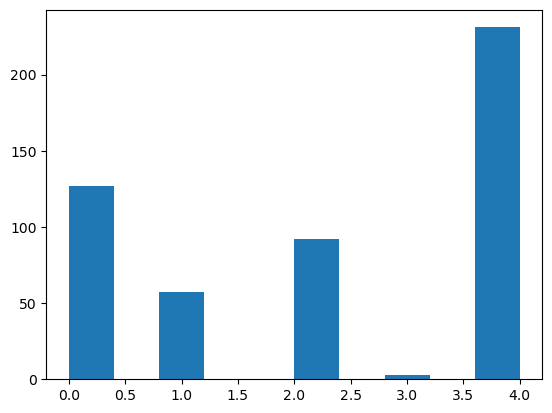

In [86]:
plt.hist(predicted_class)

In [85]:
plt.plot(actual[300:])

NameError: name 'actual' is not defined

In [ ]:
actual = np.array(meta1['label1'])

In [ ]:
predicted[196]

In [206]:
meta[meta['label2']==1]['label1']

2019-01-18    0.175989
2019-01-25    0.945062
2019-01-28   -1.956222
2019-02-07   -1.578411
2019-03-06   -1.387350
                ...   
2021-11-30   -1.530227
2021-12-15    2.497757
2021-12-17    0.678920
2022-01-03    2.211832
2022-01-04   -1.691559
Name: label1, Length: 99, dtype: float64